In [2]:
import sys
import logging
import seaborn as sns
sys.path.append("../")
from experiments.scms import impossible_for_contextual_bo as environ
from experiments.pomps_experiment import POMPSExperiment, MixedPolicyScope, CoBOExperiment
from experiments.causal_bo_experiment import CaBOExperiment, OptimizationObjective
import pandas as pd
import networkx as nx
import numpy as np

In [19]:
smoke_test = False
n_iter = 300
experiment_name = 'test_cobo_imp'

exp = POMPSExperiment(environ.fcm, {"X1", "X2"}, {"C"}, environ.domain, "Y", [MixedPolicyScope(set())],
                          n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name, debug=True)
# exp = CoBOExperiment(environ.fcm, {"X1", "X2"}, {"C"},
#                          environ.domain, "Y", [MixedPolicyScope(set())], debug=smoke_test,
#                          n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name)
# exp = CaBOExperiment(environ.fcm, {"C", "U1", "U2"},
#                          environ.domain, "Y", n_iter=16 if smoke_test else n_iter,
#                          experiment_name=experiment_name, objetive=OptimizationObjective.minimize)
exp.iterate({"smoke_test": smoke_test, "seed": 42}, smoke_test=True)

  0%|          | 0/300 [00:00<?, ?it/s]

('None detected in acquisition function. Choosing 0',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.4150), 'X1': -1.0, 'X2': tensor(0.2293), 'Y': tensor(0.0782)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.1136), 'X1': 0.0, 'X2': tensor(-0.1482), 'Y': tensor(0.0211)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6169), 'X1': 0.5, 'X2': tensor(-0.0496), 'Y': tensor(0.0147)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.1099), 'X1': -0.9872219122492957, 'X2': tensor(0.1229), 'Y': tensor(0.0337)}",)
('None detected in acquisition function. Choosing 1',)
("Policy for {'X2'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.6579), 'X1': tensor(-0.6579), 'X2': -2.0, 'Y': tensor(-1.6389)}",)
(

("Sample is {'C': tensor(0.1330), 'X1': tensor(0.1330), 'X2': 1.9987363472825208, 'Y': tensor(1.7388)}",)
(array([[  2.40955687,  -6.58878231,  -4.90279675],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6254), 'X1': -0.9933181299969815, 'X2': tensor(-0.3835), 'Y': tensor(0.1747)}",)
(array([[  3.77692151,  -0.88276786,  -0.38755304],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4733), 'X1': -0.5366476292735791, 'X2': tensor(-0.0559), 'Y': tensor(0.0039)}",)
(array([[  1.59988928,  -7.85028553,  -6.13765478],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0481), 'X1': -0.8033773592027004, 'X2': tensor(-0.2210), 'Y': tensor(0.0869)}",)
(array([[  2.13773417,  -7.96

("Sample is {'C': tensor(-0.6855), 'X1': 0.7433201162634451, 'X2': tensor(0.3823), 'Y': tensor(0.1398)}",)
(array([[  3.25519943,  -1.47983801,  -0.60285527],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.8523), 'X1': -0.6634055091660326, 'X2': tensor(-0.7015), 'Y': tensor(0.5185)}",)
(array([[  4.4355998 ,  -1.02297425,  -0.62102276],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.7220), 'X1': -0.7053293379843784, 'X2': tensor(0.5838), 'Y': tensor(0.3482)}",)
(array([[  3.65569401,  -1.59445667,  -0.72932047],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.7968), 'X1': -0.620209623416879, 'X2': tensor(0.7432), 'Y': tensor(0.5779)}",)
(array([[  4.16408634,  -1.89022

("Sample is {'C': tensor(0.5310), 'X1': 0.22593017313067038, 'X2': tensor(0.5000), 'Y': tensor(0.4487)}",)
(array([[  4.6545105 ,  -3.13683128,  -2.34090352],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.7855), 'X1': 0.7372653723080718, 'X2': tensor(-0.0214), 'Y': tensor(-0.0074)}",)
(array([[  4.74357319,  -1.52299249,  -0.83921653],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.1017), 'X1': 0.22606307737740453, 'X2': tensor(0.2802), 'Y': tensor(0.0885)}",)
(array([[  4.32305717,  -2.55829549,  -1.86888623],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.1794), 'X1': 0.2816516478304458, 'X2': tensor(-0.9534), 'Y': tensor(0.9168)}",)
(array([[  3.63086081,  -1.00

("Sample is {'C': tensor(-0.7414), 'X1': 0.49764104126487824, 'X2': tensor(-0.6038), 'Y': tensor(0.3795)}",)
(array([[  4.92014265,  -2.96778321,  -2.14010787],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.8317), 'X1': 0.018573902904469513, 'X2': tensor(0.1886), 'Y': tensor(0.0606)}",)
(array([[  4.6620307 ,  -3.19159412,  -2.37057114],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.2529), 'X1': -0.006825697150161555, 'X2': tensor(0.5640), 'Y': tensor(0.3378)}",)
(array([[  4.53803539,  -3.05257535,  -2.2625351 ],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.8556), 'X1': -0.6321031907640599, 'X2': tensor(-0.8840), 'Y': tensor(0.8300)}",)
(array([[  4.52118111,  

("Sample is {'C': tensor(0.2743), 'X1': 0.4209158573047369, 'X2': tensor(-0.5833), 'Y': tensor(0.5544)}",)
(array([[ 6.42105818e+00,  1.06919765e+00, -4.28589614e-04],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.6568), 'X1': -0.10560061149822825, 'X2': tensor(-0.0734), 'Y': tensor(0.0031)}",)
(array([[  4.88598394,  -4.03213501,  -3.1076405 ],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0932), 'X1': -0.559867803883502, 'X2': tensor(-0.0412), 'Y': tensor(0.0030)}",)
(array([[  5.09499073,  -4.1559906 ,  -3.23860407],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0128), 'X1': 0.171388194389404, 'X2': tensor(0.9580), 'Y': tensor(0.9496)}",)
(array([[ 4.5

("Sample is {'C': tensor(-0.6386), 'X1': 0.2013612962969163, 'X2': tensor(0.7191), 'Y': tensor(0.6196)}",)
(array([[ 7.31361866e+00,  9.03568745e-01, -2.29837163e-03],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.8207), 'X1': 0.6487176435716684, 'X2': tensor(-0.0700), 'Y': tensor(-0.0032)}",)
(array([[  4.62760401,  -2.84701586,  -2.11150861],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.1592), 'X1': 0.09977945854557219, 'X2': tensor(-0.8295), 'Y': tensor(0.7373)}",)
(array([[ 8.21901131e+00,  1.25306773e+00, -2.58091441e-05],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.6165), 'X1': 0.1552700264881632, 'X2': tensor(-0.6573), 'Y': tensor(0.52

("Sample is {'C': tensor(-0.2068), 'X1': 0.29457294940948486, 'X2': tensor(-0.2966), 'Y': tensor(0.0866)}",)
(array([[  4.90218925,  -2.90465403,  -2.1533699 ],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.2305), 'X1': 0.11812173265687048, 'X2': tensor(-0.7448), 'Y': tensor(0.6287)}",)
(array([[ 8.03436852e+00,  1.00347733e+00, -7.97589717e-04],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3448), 'X1': 0.17718683697925328, 'X2': tensor(0.6066), 'Y': tensor(0.3749)}",)
(array([[ 7.38155031e+00,  9.79025722e-01, -9.66181047e-04],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.7284), 'X1': 0.033614365138226965, 'X2': tensor(-0.5689), 'Y': tensor(0

("Sample is {'C': tensor(-0.1451), 'X1': 0.21456456576822308, 'X2': tensor(0.5357), 'Y': tensor(0.2869)}",)
(array([[ 6.96870041e+00,  1.21428645e+00, -5.58511128e-05],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.3466), 'X1': 0.15053103755838482, 'X2': tensor(-0.4268), 'Y': tensor(0.2367)}",)
(array([[ 8.05744553e+00,  1.07091308e+00, -4.28052939e-04],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3947), 'X1': 0.15932167799949792, 'X2': tensor(-0.3364), 'Y': tensor(0.1156)}",)
(array([[ 7.15635014e+00,  1.40195990e+00, -1.60932666e-06],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6142), 'X1': 0.12318136253284817, 'X2': tensor(0.4846)

("Sample is {'C': tensor(0.2484), 'X1': -0.6852467954597516, 'X2': tensor(0.5018), 'Y': tensor(0.3072)}",)
(array([[ 6.45311356e+00,  1.38969040e+00, -3.21865605e-06],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.0647), 'X1': 0.20059887129447784, 'X2': tensor(0.5517), 'Y': tensor(0.3094)}",)
(array([[ 5.42956066e+00,  1.46598804e+00, -4.76837272e-07],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0187), 'X1': 0.187208890914917, 'X2': tensor(-0.7975), 'Y': tensor(0.6637)}",)
(array([[ 5.69294357e+00,  1.19727790e+00, -8.65496913e-05],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.5810), 'X1': 0.7893960044732824, 'X2': tensor(0.9096), 'Y

("Sample is {'C': tensor(0.3338), 'X1': -0.841083445767503, 'X2': tensor(0.2855), 'Y': tensor(0.1088)}",)
(array([[ 7.06179714e+00,  1.33580065e+00, -1.68086517e-05],
       [ 1.05671060e+00, -1.69244766e+01, -1.40328426e+01]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.2061), 'X1': 0.18760116880397648, 'X2': tensor(-0.1306), 'Y': tensor(0.0150)}",)
(array([[  9.22098637,  -0.71257836,  -0.49777839],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4859), 'X1': 0.07267219468681083, 'X2': tensor(0.1511), 'Y': tensor(0.0222)}",)
(array([[  8.71236515,  -1.54641628,  -1.04993093],
       [  1.0567106 , -16.92447662, -14.03284264]]),)
('Optimal indexes [0]',)
("Policy for {'X1'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.3693), 'X1': 0.11949008132191852, 'X2': tensor(-0.3881), 'Y': tensor(0.1949)}",)
(array([[  

In [26]:
df = pd.DataFrame(exp._results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 1/3-df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

<AxesSubplot:xlabel='C', ylabel='X1'>

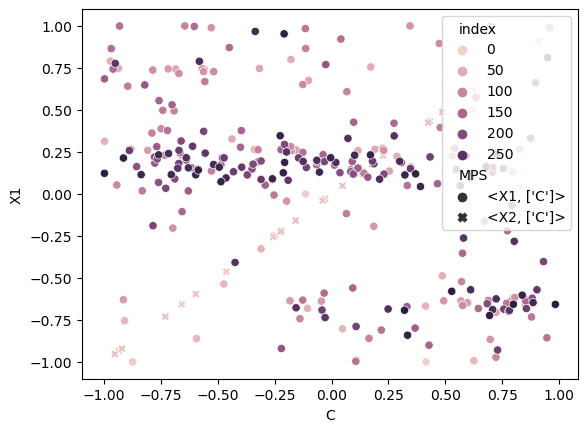

In [31]:
sns.scatterplot(data=df, x='C', y='X1', hue='index', style='MPS')

<AxesSubplot:ylabel='MPS'>

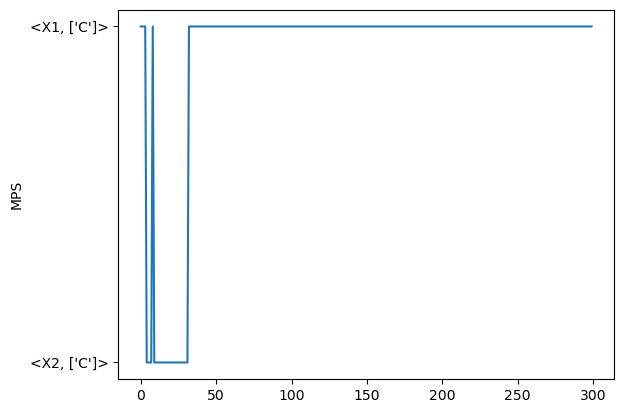

In [27]:
sns.lineplot(df.MPS)

<AxesSubplot:>

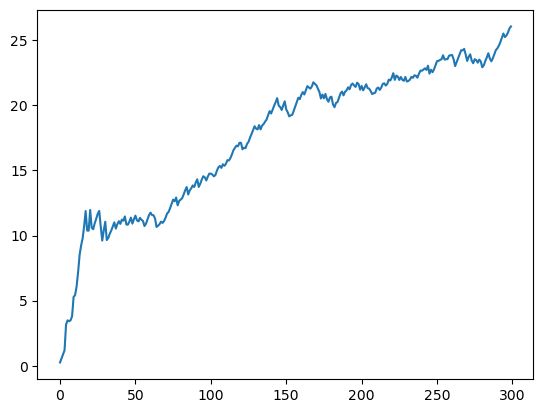

In [28]:
df.Cum_Regret.plot()

In [25]:
exp.

SyntaxError: invalid syntax (1779861486.py, line 1)